# Рынок заведений общественного питания Москвы

## План работы:
___
##### [Шаг 1. Загрузка и предобработка данных](#1-link)

##### [Шаг 2. Анализ данных](#2-link)
* [Соотношение видов объектов общественного питания по количеству](#3-link)
* [Соотношение сетевых и несетевых заведений по количеству](#4-link)
* [Определение видов объектов общественного питания, для которых характерно сетевое распространение](#5-link)
* [Оценка характерного кол-ва посадочных мест для сетевых заведений](#6-link)
* [Среднее количество посадочных мест для каждого из видов объектов общественного питания](#7-link)
* [Определение районов исследуемых улиц](#8-link)
* [Список районов, через которые проходят улицы из ТОП10](#14-link)
* [Улицы с самой большой плотностью заведений общепита](#12-link)
* [Районы с самой большой плотностью заведений общепита](#13-link)
* [Число улиц с одним объектом общественного питания, а также районы Москвы, к которым они относятся](#9-link)
* [Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания](#10-link)

##### [Шаг 3. Общий вывод и  рекомендации о виде заведения, количестве посадочных мест, а также районе расположения, возможности развития сети](#11-link)

# Шаг №1. Загрузка и предобработка данных<a id='1-link'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Мы получили датасет для анализа рынка заведений общественного питания Москвы

In [2]:
df = pd.read_csv(r'C:\rest_data.csv')

##### Таблица rest_data:
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Пропущенные значения не выявлены, типы данных соответствуют содержанию столбцов

In [4]:
df.duplicated().sum()

0

Дубликаты не выявлены

In [5]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


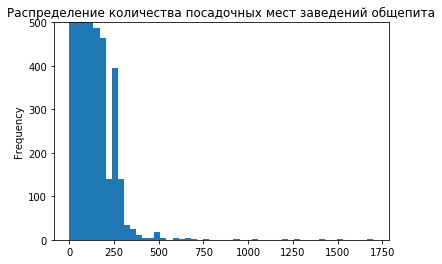

In [6]:
df['number'].plot(kind='hist', bins=50)
plt.title('Распределение количества посадочных мест заведений общепита')
plt.ylim(0, 500);

Мы обратили внимание на наличие заведений, где отсутствуют посадочные места. Оценив структуру мы заметили, что большинство типов заведений не должны или могут не иметь мест для посетителей, однако ресторан и кафе в эту группу не входят, но т.к. количество таких строк невысоко и аюсолютной уверенности в том, что эти данные выброс у нас нет, мы оставим это как есть

In [7]:
df.query("number == 0").groupby('object_type')['id'].count()

object_type
бар                                   28
буфет                                 68
закусочная                           189
кафе                                 310
кафетерий                            113
магазин (отдел кулинарии)            145
предприятие быстрого обслуживания    704
ресторан                              45
столовая                              19
Name: id, dtype: int64

In [8]:
np.percentile(df['number'], [95, 99])

array([214., 300.])

не более 1% ресторанов имеет в распоряжении более 300 мест, соответственно для анализа текущего положения на рынке мы оставим только данные о заведениях не превышающих этот порог, 300 посадочных мест - адекватное значения для больших ресторанов, а так-же банкетных залов

In [9]:
df = df.query('number < 301')

Для более точного определения кафе принадлежащих к одной сети лемматизируем названия для выявления наиболее часто встречающихся слов

In [10]:
from pymystem3 import Mystem
m = Mystem()

purpose = ', '.join(df['object_name'].unique())
lemmas = m.lemmatize(purpose)

from collections import Counter
dict1 = Counter(lemmas)
list1 = list(dict1.items())
list1.sort(key=lambda i: i[1], reverse=True)
for i in list1:
    print(i[0], ':', i[1])

  : 11748
,  : 8204
 « : 2108
»,  : 2061
кафе : 1413
столовая : 1009
- : 792
школа : 705
№ : 643
ресторан : 545
при : 498
бар : 415
. : 385
.  : 348
гбоу : 272
буфет : 227
и : 197
ШК : 164
пицца : 162
кофе : 146
суша : 140
пекарня : 130
сош : 124
в : 124
),  : 116
 ( : 111
колледж : 108
на : 106
1 : 98
кофейня : 88
кальянный : 86
гоу : 85
кухня : 85
клуб : 78
шаурма : 77
питание : 74
паб : 68
а : 63
& : 62
 -  : 61
Bar : 60
с : 59
гриль : 58
 &  : 57
пиццерия : 57
донер : 55
»  : 53
Lounge : 53
хаус : 52
хинкальный : 50
КДП : 49
чайхана : 49
бургер : 48
выпечка : 47
кулинария : 47
комбинат : 46
дом : 46
московский : 45
дворик : 44
доготовочный : 44
Coffee : 44
чайхон : 43
старый : 41
караоке : 41
он : 41
3 : 40
столовый : 40
лавка : 40
гостиница : 40
центр : 39
быстрый : 39
Cafe : 39
2 : 39
м : 38
мгу : 38
кп : 38
' : 37
ЦО : 37
bar : 36
еда : 36
москва : 36
гимназия : 35
у : 35
обслуживание : 35
веранда : 35
стол : 34
кебаб : 34
бистро : 34
предприятие : 34
and : 33
оао : 33
парк : 33

Ниже мы убрали из названий наиболее часто встречающиеся слова и символы, а также пробелы, таким образом повысим качество определения заведений одной сети при группировке 

In [11]:
df['object_name'] = df['object_name'].str.lower()
df['object_name'] = df['object_name'].str.replace('«', '')
df['object_name'] = df['object_name'].str.replace(' ', '')
df['object_name'] = df['object_name'].str.replace('»', '')
df['object_name'] = df['object_name'].str.replace('столовая', '')
df['object_name'] = df['object_name'].str.replace('ресторан', '')
df['object_name'] = df['object_name'].str.replace('бар', '')
df['object_name'] = df['object_name'].str.replace('кафе', '')
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фастфуд')

# Шаг №2. Анализ данных<a id='2-link'></a>

#### Соотношение видов объектов общественного питания по количеству<a id='3-link'></a>

Рассчитаем количество заведений каждого типа и определим их долю от общего количества

In [12]:
object_type_count = df.groupby('object_type')['id'].count().reset_index().sort_values(ascending=False, by='id')
object_type_count.columns = ['type', 'count']
object_type_count['share'] = object_type_count['count'] / object_type_count['count'].sum()
object_type_count

,type,count,share
3,кафе,6092,0.399659
7,столовая,2540,0.166634
6,ресторан,2221,0.145706
8,фастфуд,1920,0.125959
0,бар,855,0.056091
1,буфет,584,0.038313
4,кафетерий,398,0.026110
2,закусочная,360,0.023617
5,магазин (отдел кулинарии),273,0.017910


Визуально оценить какие заведения занимают большую часть рынка проще, построим круговую диаграмму

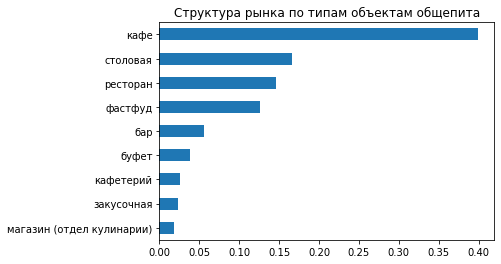

In [13]:
object_type_count.groupby('type')['share'].sum().sort_values().plot(kind='barh')
plt.title('Структура рынка по типам объектам общепита')
plt.ylabel('');

Лидер - кафе (40%), столовые, рестораны и фастфуд занимают соизмеримые доли от 12,6 до  16,7 процентов. Прочие заведения больше относятся к формату взять с собой и занимают не более 5,6% рынка.

#### Соотношение сетевых и несетевых заведений по количеству<a id='4-link'></a>

Посмотрим какую долю рынка занимают сетевые/несетевые заведения

In [14]:
chain_count = df.groupby('chain')['id'].count().reset_index().sort_values(ascending=False, by='id')
chain_count.columns = ['type', 'count']
chain_count['share'] = chain_count['count'] / chain_count['count'].sum()
chain_count['type'] = chain_count['type'].str.replace('нет', 'несетевые')
chain_count['type'] = chain_count['type'].str.replace('да', 'сетевые')

Доля рынка сетевых/несетевых объектов общепита

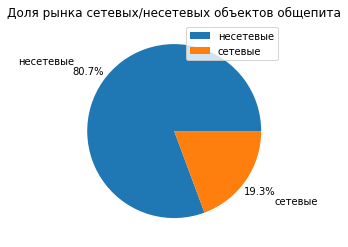

In [15]:
chain_count.groupby('type')['share'].sum().plot(kind='pie', autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.4)
plt.title('Доля рынка сетевых/несетевых объектов общепита')
plt.legend()
plt.ylabel('');

Как мы можем заметить, подавляющую долю рынка занимают несетевые заведения.

#### Определение видов объектов общественного питания, для которых характерно сетевое распространение<a id='5-link'></a>

Давайте оценим какого типа заведений больше, если рассмотреть только сети

In [16]:
company_network = df.query('chain == "да"')
company_network_count = company_network.groupby('object_type')['id'].count().reset_index().sort_values(ascending=False, by='id')
company_network_count.columns = ['type', 'count']
company_network_count['share'] = company_network_count['count'] / company_network_count['count'].sum()
company_network_count

,type,count,share
3,кафе,1393,0.472364
8,фастфуд,788,0.267209
6,ресторан,531,0.180061
5,магазин (отдел кулинарии),78,0.026450
2,закусочная,56,0.018989
4,кафетерий,52,0.017633
0,бар,37,0.012547
1,буфет,11,0.003730
7,столовая,3,0.001017


Структура рынка сетевых компаний по типам объектам общепита

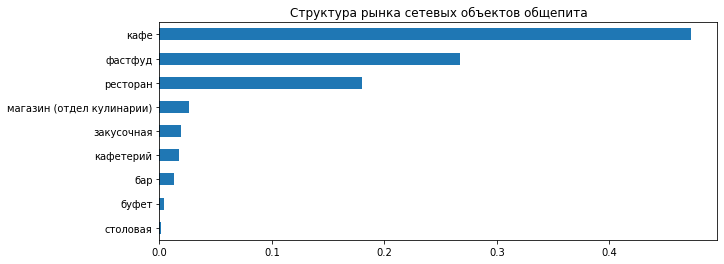

In [17]:
company_network_count.groupby('type')['share'].sum().sort_values().plot(kind='barh', figsize=(10,4))
plt.title('Структура рынка сетевых объектов общепита')
plt.ylabel('');

Структура несильно отличается от общей, однако фастфуд все таки обошел рестораны

#### Оценка характерного кол-ва посадочных мест для сетевых заведений<a id='6-link'></a>

Оценим количество посадочных мест в сетевых заведениях

In [18]:
company_network_median_n = company_network.groupby('object_name').agg({'object_name':'count', 'number':'median'}).sort_values(ascending=False, by='number')
company_network_median_n.columns = ['n_objects', 'median_n']

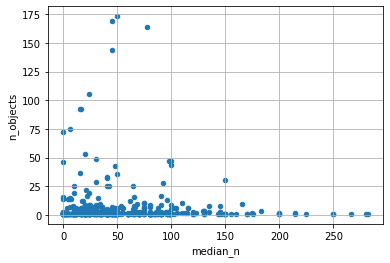

In [19]:
company_network_median_n.plot(kind='scatter', y = 'n_objects', x = 'median_n', grid=True);

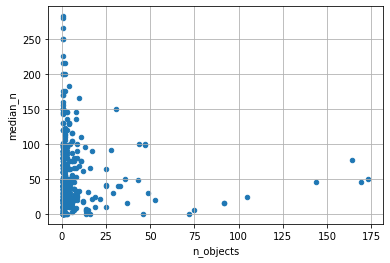

In [20]:
company_network_median_n.plot(kind='scatter', x = 'n_objects', y = 'median_n', grid=True);

Визуально мы можем оценить, чтодля сетевых заведений характерно до 100 мест 

Для несетевых компаний

In [21]:
company_lonely = df.query('chain == "нет"')
company_lonely_median_n = company_lonely.groupby('object_name').agg({'object_name':'count', 'number':'median'}).sort_values(ascending=False, by='number')
company_lonely_median_n.columns = ['n_objects', 'median_n']

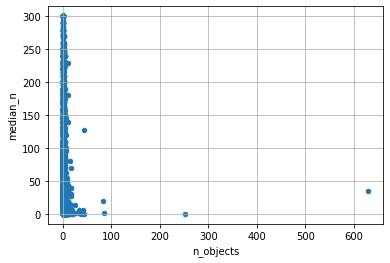

In [22]:
company_lonely_median_n.plot(kind='scatter', x = 'n_objects', y = 'median_n', grid=True);

Построим распределение в меньшем масштабе для более точной оценки.

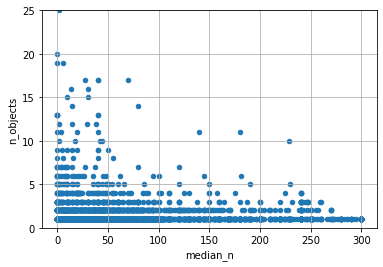

In [23]:
company_lonely_median_n.plot(kind='scatter', y = 'n_objects', x = 'median_n', grid=True);
plt.ylim(0, 25);

Для большинства несетевых заведений характерно до 100 посадочных мест, но в отдельных случаях данное значение может доходить до 300.

#### Среднее количество посадочных мест для каждого из видов объектов общественного питания<a id='7-link'></a>

Определим какое среднее количество мест характерно для несетевых заведений в разрезе типов 

In [24]:
company_lonely_number = company_lonely.groupby('object_type')['number'].mean().reset_index().sort_values(ascending=False, by='number')
company_lonely_number

,object_type,number
7,столовая,124.684667
6,ресторан,83.069822
1,буфет,51.397906
0,бар,41.037897
3,кафе,37.130240
4,кафетерий,8.650289
8,фастфуд,6.846290
2,закусочная,6.361842
5,магазин (отдел кулинарии),4.353846


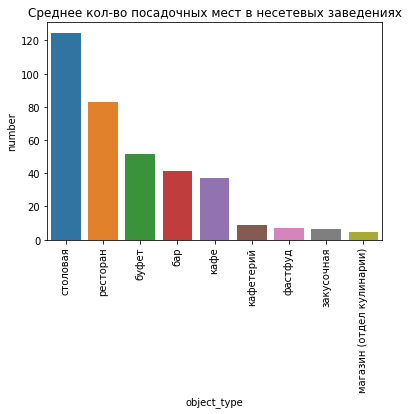

In [25]:
chart = sns.barplot(x="object_type", y="number", data=company_lonely_number)
plt.title('Среднее кол-во посадочных мест в несетевых заведениях')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Больше всего посадочных мест в столовых (125), далее идут рестораны (80), бары и и буфеты (41-51), меньше всего мест в забегаловках, где еда готовится преимущественно на доставку или на вынос.

Рассмотрим ответ на аналогичный вопрос в отношении сетевых заведений

In [26]:
company_network_number = company_network.groupby('object_type')['number'].mean().reset_index().sort_values(ascending=False, by='number')
company_network_number

,object_type,number
7,столовая,112.333333
6,ресторан,93.634652
0,бар,53.027027
3,кафе,46.638909
8,фастфуд,38.467005
2,закусочная,14.375000
1,буфет,12.727273
4,кафетерий,12.269231
5,магазин (отдел кулинарии),8.679487


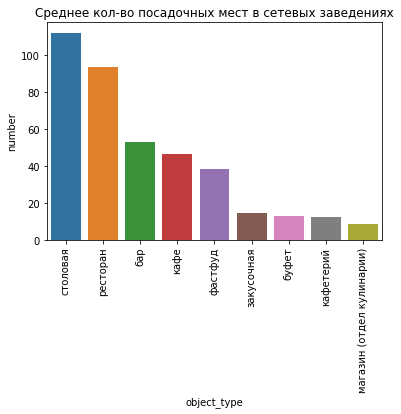

In [27]:
chart2 = sns.barplot(x="object_type", y="number", data=company_network_number)
plt.title('Среднее кол-во посадочных мест в сетевых заведениях')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90);

Больше всего посадочных мест в столовых (112), далее идут рестораны (93), бары и и кафе (53 и 46), меньше всего мест в забегаловках, где еда готовится преимущественно на доставку или на вынос (до 10)

Выделим в отдельный столбец информацию об улице из столбца address .

Для обработки адреса и выделения названия улицы воспользуемся split

In [28]:
streets = df['address'].str.split(',', expand=True)
df['street2'] = streets[2]
df['street'] = streets[1]
df['city'] = streets[0]
df['street'] = df['street'].str.replace(' ', '')

#### Для определения районов, к которым относятся улицы используем данные из внешнего источника data.mos.ru, а именно классификатор улиц<a id='8-link'></a>

In [29]:
from io import BytesIO
import requests
spreadsheet_id1 = '11JR7ej69oI_fFIus2QkWMQjcG52IoScHSqfakgPCDB8'
file_name1 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id1) 
r1 = requests.get(file_name1)
street_data = pd.read_csv(BytesIO(r1.content))
street_data.head()

street_data = street_data[['UM_NAMEF', 'UM_TE']].sort_values(by='UM_NAMEF')
street_data = street_data.drop_duplicates()
street_data.columns = ['street', 'district_id']
street_data['street'] = street_data['street'].str.replace(' ', '')

In [30]:
from io import BytesIO
import requests
spreadsheet_id2 = '16C5h4RX7N91I9RYls3aXLgHHv8EVVKRJ0JHREMG3saI'
file_name2 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id2) 
r2 = requests.get(file_name2)
dist_code = pd.read_csv(BytesIO(r2.content))

dist_code = dist_code[['Kod', 'Name']]

Логично предположить, что самое большое количество заведений будет в Москве, выделим их в отдельную таблицу и построим ТОП

##### ТОП 10 улиц

In [31]:
moscow = df.query('city == "город Москва"')
moscow_count = moscow.groupby('street')['id'].count().sort_values(ascending=False).reset_index()
moscow_count.head(13)

,street,id
0,городЗеленоград,231
1,проспектМира,203
2,Профсоюзнаяулица,182
3,Ленинградскийпроспект,170
4,Пресненскаянабережная,165
5,Варшавскоешоссе,159
6,Ленинскийпроспект,146
7,поселениеСосенское,138
8,проспектВернадского,130
9,Кутузовскийпроспект,112


В детализации вместе с названиями улиц попались Зеленоград и Сосенское, мы исключаем данные объекты из анализа топ10 улиц, предварительно проверив, могут ли улицы включенные в данные объекты претендовать на топ10

In [32]:
greentown = df.query('street == "городЗеленоград"')
greentown.groupby('street2')['id'].count().sort_values(ascending=False)

street2
 Крюковская площадь             12
 Панфиловский проспект           9
 площадь Юности                  7
 проспект Генерала Алексеева     7
 Савёлкинский проезд             6
                                ..
 корпус 344А                     1
 корпус 401                      1
 корпус 403А                     1
 корпус 421А                     1
 корпус 1637                     1
Name: id, Length: 136, dtype: int64

In [33]:
sosenskoe = df.query('street == "поселениеСосенское"')
sosenskoe.groupby('street2')['id'].count().sort_values(ascending=False)

street2
 посёлок Коммунарка              60
 Калужское шоссе                 38
 деревня Сосенки                 13
 улица Сервантеса                 6
 ж/к "Дубровка"                   6
 бульвар Веласкеса                4
 улица Александры Монаховой       3
 территория СНТ "Гавриково-1"     2
 Николо-Хованская улица           2
 улица Поляны                     1
 улица Адмирала Корнилова         1
 посёлок Газопровод               1
 деревня Николо-Хованское         1
Name: id, dtype: int64

В Сосенском и Зеленограде нет улиц, входящих в ТОП10

Определим, через какие районы проходят улицы из списка ТОП10

In [34]:
top10street = moscow_count.head(12)

In [35]:
top10street_district = pd.merge(top10street, street_data, on='street')
top10street_district.head(100)

,street,id,district_id
0,проспектМира,203,0105;0301;0309;0310;0312;0313;0317
1,Профсоюзнаяулица,182,0701;0704;0707;0709;0710;0712
2,Ленинградскийпроспект,170,0201;0202;0214;0217
3,Пресненскаянабережная,165,0106
4,Варшавскоешоссе,159,0610;0613;0615;0619;0620;0621;0708;0711;1111
5,Ленинскийпроспект,146,0110;0610;0702;0706;0707;0709;0814;0817
6,проспектВернадского,130,0702;0706;0814;0815;0817
7,Кутузовскийпроспект,112,0805;0819
8,Кировоградскаяулица,110,0619;0620;0621
9,Каширскоешоссе,110,0612;0613;0616;0617


Используем расшифровку кодов районов и создадим список районов с наименованиями

In [36]:
gg = top10street_district['district_id'].str.split(';', expand=True)
distr_listfortop10 = pd.concat([gg[1], gg[2], gg[3], gg[4], gg[5], gg[6], gg[7], gg[8]]).drop_duplicates()
distr_listfortop10 = pd.DataFrame(distr_listfortop10)
distr_listfortop10.columns = ['Kod']
distr_listfortop10 = distr_listfortop10.dropna()
distr_listfortop10['Kod'] = distr_listfortop10['Kod'].astype('int64')

#### Список районов, через которые проходят улицы из ТОП10<a id='14-link'></a>

In [37]:
top_dist = pd.merge(distr_listfortop10, dist_code)
top_dist['Name'].unique()

array(['Алексеевский район', 'район Коньково', 'район Беговой',
       'район Нагатино-Садовники', 'Донской район', 'Ломоносовский район',
       'район Фили-Давыдково', 'район Чертаново Центральное',
       'район Марьина Роща', 'Обручевский район', 'район Сокол',
       'Нагорный район', 'Гагаринский район',
       'район Проспект Вернадского', 'район Чертаново Южное',
       'район Орехово-Борисово Северное', 'Останкинский район',
       'район Тёплый Стан', 'Хорошёвский район',
       'район Чертаново Северное', 'район Раменки',
       'район Орехово-Борисово Южное', 'район Ростокино',
       'район Черёмушки', 'район Тропарёво-Никулино', 'район Свиблово',
       'район Ясенево', 'Ярославский район', 'район Северное Бутово',
       'район Южное Бутово', 'поселение Щербинка'], dtype=object)

Также неплохо было бы оценить плотность распределения заведений, т.к. в первоначальном ТОП10 количество районов через которые проходят улицы вырьируется от одного до нескольких, соответственно выделим ТОП10 улиц, где на 1 район в среднем приходится большее количество заведений

In [38]:
moscow_top10 = pd.merge(moscow_count, street_data, on='street')
moscow_top10['n_of_districts'] = moscow_top10['district_id'].str.count(';') + 1
moscow_top10['objects_per_district'] = moscow_top10['id'] / moscow_top10['n_of_districts']
moscow_top10 = moscow_top10.sort_values(by='objects_per_district', ascending=False).reset_index(drop=True)
moscow_top10 = moscow_top10.head(10)
moscow_top10

,street,id,district_id,n_of_districts,objects_per_district
0,Пресненскаянабережная,165,0106,1,165.0
1,Ходынскийбульвар,102,0217,1,102.0
2,улицаНовыйАрбат,92,0101,1,92.0
3,улицаЛенинскаяСлобода,84,0609,1,84.0
4,Пятницкаяулица,79,0103,1,79.0
5,улицаПокровка,77,0102,1,77.0
6,Люблинскаяулица,76,1111,1,76.0
7,улицаАрбат,76,0101,1,76.0
8,Тверскаяулица,68,0108,1,68.0
9,Автозаводскаяулица,66,0609,1,66.0


Ниже представлен топ 10 улиц, с учетом плотности расположения заведений по районам

In [39]:
moscow_top10['district_id'] = moscow_top10['district_id'].astype('int64')
top_dist2 = pd.merge(moscow_top10, dist_code, left_on='district_id', right_on='Kod')
del top_dist2['district_id'], top_dist2['n_of_districts'], top_dist2['id'], top_dist2['Kod'] 
top_dist2

,street,objects_per_district,Name
0,Пресненскаянабережная,165.0,Пресненский район
1,Ходынскийбульвар,102.0,Хорошёвский район
2,улицаНовыйАрбат,92.0,район Арбат
3,улицаАрбат,76.0,район Арбат
4,улицаЛенинскаяСлобода,84.0,Даниловский район
5,Автозаводскаяулица,66.0,Даниловский район
6,Пятницкаяулица,79.0,район Замоскворечье
7,улицаПокровка,77.0,Басманный район
8,Люблинскаяулица,76.0,поселение Щербинка
9,Тверскаяулица,68.0,Тверской район


#### Улицы с самой большой плотностью заведений общепита <a id='12-link'></a>

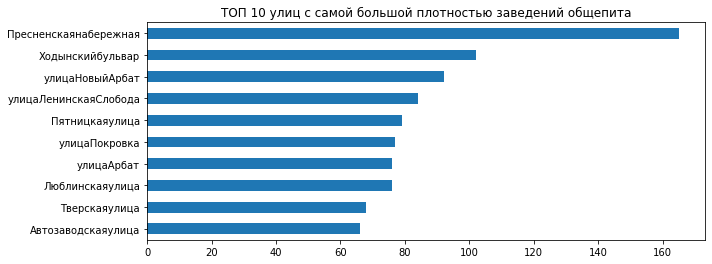

In [40]:
top_dist2.groupby('street')['objects_per_district'].sum().sort_values().plot(kind='barh', figsize=(10,4))
plt.title('ТОП 10 улиц с самой большой плотностью заведений общепита')
plt.ylabel('');

#### Районы с самой большой плотностью заведений общепита<a id='13-link'></a>

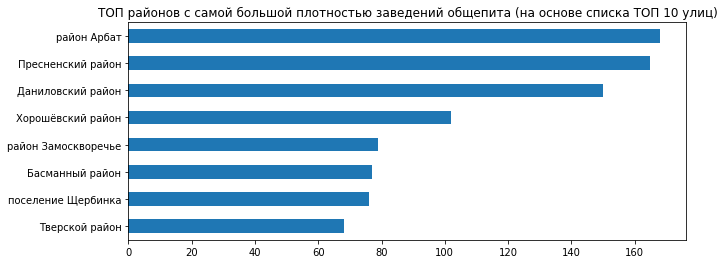

In [41]:
top_dist2.groupby('Name')['objects_per_district'].sum().sort_values().plot(kind='barh', figsize=(10,4))
plt.title('ТОП районов с самой большой плотностью заведений общепита (на основе списка ТОП 10 улиц)')
plt.ylabel('');

В ходе анализа нами было решено использовать в определении ТОП 10 улиц количество затрагиваемых ими районов и рассчитывать показатель с этим учетом. Таким образом самые "наполненные" заведениями районы - Арбат, Пресненский и Даниловский районы. 

#### Число улиц с одним объектом общественного питания, а также районы Москвы, к которым они относятся<a id='9-link'></a>

Выделим названия улиц с 1 объектом питания

In [42]:
moscow_uno = moscow_count.query('id == 1').sort_values(by='street')
moscow_uno.count()

street    548
id        548
dtype: int64

Объединим данные о районах и улицах в 1 датафрейм

In [43]:
uno_object_street = pd.merge(moscow_uno, street_data, on='street')
del uno_object_street['id']

Объединим коды районов, по которым проходят улицы с 1 заведением в список

In [44]:
zz = uno_object_street['district_id'].str.split(';', expand=True)
distr_listforuno = pd.concat([zz[1], zz[2], zz[0]]).drop_duplicates()
distr_listforuno = pd.DataFrame(distr_listforuno)
distr_listforuno.columns = ['Kod']
distr_listforuno = distr_listforuno.dropna()
distr_listforuno['Kod'] = distr_listforuno['Kod'].astype('int64')

In [45]:
uno_dist = pd.merge(distr_listforuno, dist_code)
uno_dist['Name'].unique()

array(['Красносельский район', 'Мещанский район', 'район Измайлово',
       'Хорошёвский район', 'район Ясенево', 'район Соколиная Гора',
       'район Сокол', 'район Хамовники', 'Таганский район',
       'район Очаково-Матвеевское', 'Даниловский район',
       'район Кузьминки', 'Донской район', 'район Куркино',
       'Пресненский район', 'район Новогиреево', 'Головинский район',
       'Нижегородский район', 'район Хорошёво-Мнёвники', 'район Перово',
       'район Зюзино', 'район Южное Медведково', 'Обручевский район',
       'район Преображенское', 'Тверской район', 'район Марьина Роща',
       'район Люблино', 'район Северное Измайлово', 'район Коптево',
       'район Аэропорт', 'Басманный район', 'район Свиблово',
       'Рязанский район', 'район Якиманка', 'район Лефортово',
       'район Печатники', 'район Сокольники', 'район Замоскворечье',
       'район Арбат', 'Алексеевский район', 'район Текстильщики',
       'район Ростокино', 'район Раменки', 'район Покровское-Стрешнево',

#### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания<a id='10-link'></a>

Отфильтруем датасет, оставив только улицы из top10

In [46]:
top10street_list = moscow_top10['street']
df['top10'] = df['street'].isin(top10street_list)
top10_df = df.query('top10 == True')
top10_df.describe()

,id,number
count,885.000000,885.000000
mean,150747.970621,44.350282
std,61167.093125,50.595743
min,20242.000000,0.000000
25%,120924.000000,10.000000
50%,168236.000000,30.000000
75%,198336.000000,60.000000
max,223331.000000,300.000000


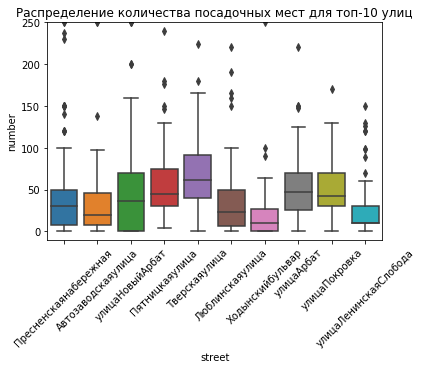

In [47]:
ax = sns.boxplot(x='street', y='number', 
                 data=top10_df.sort_values(by='number', ascending=False));
plt.xticks(rotation=45);
ax.set_ylim(-10, 250);
plt.title('Распределение количества посадочных мест для топ-10 улиц');

Медианное значение кол-ва мест 50, среднее значение 44.

Структура рынка по типам объектам общепита ТОП 10

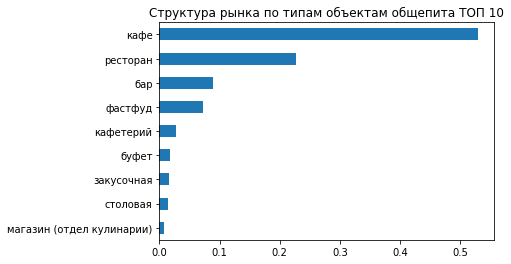

In [48]:
object_type_count_top10 = top10_df.groupby('object_type')['id'].count().reset_index().sort_values(ascending=False, by='id')
object_type_count_top10.columns = ['type', 'count']
object_type_count_top10['share'] = object_type_count_top10['count'] / object_type_count_top10['count'].sum()

object_type_count_top10.groupby('type')['share'].sum().sort_values().plot(kind='barh')
plt.title('Структура рынка по типам объектам общепита ТОП 10')
plt.ylabel('');

Распределение совпадает с аналогичным по всему рынку в целом

Рассмотрим долю сетевых/несетевых заведений, располагающихся на ТОП10 улицах

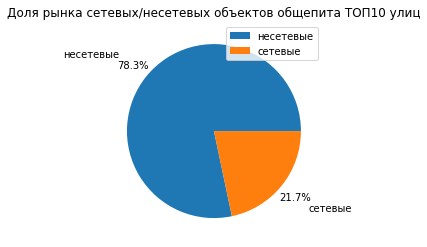

In [49]:
chain_count_top10 = top10_df.groupby('chain')['id'].count().reset_index().sort_values(ascending=False, by='id')
chain_count_top10.columns = ['type', 'count']
chain_count_top10['share'] = chain_count_top10['count'] / chain_count_top10['count'].sum()
chain_count_top10['type'] = chain_count_top10['type'].str.replace('нет', 'несетевые')
chain_count_top10['type'] = chain_count_top10['type'].str.replace('да', 'сетевые')

chain_count_top10.groupby('type')['share'].sum().plot(kind='pie', autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.4)
plt.title('Доля рынка сетевых/несетевых объектов общепита ТОП10 улиц')
plt.legend()
plt.ylabel('');

Доля сетевых заведений составила 21,7%, что означает что концентрация сетевых заведений на ТОП 10 улицах выше, чем в среднем по рынку

### Общий вывод и  рекомендации о виде заведения, количестве посадочных мест, а также районе расположения, возможности развития сети.<a id='11-link'></a>

Так как спецификой заведения будут являться роботы, то для реализации идеи, помимо предложенного варианта кафе можно рассмотреть:
 - буфет/магазин/кафетерий/бар в котором будет готовая еда, а робот будет осуществлять функцию некого кассира, общаться с пользователем, принимать заказ, выдавать его и поднимать настроение покупателям. В настоящее время данные форматы продажи еды активно развиваются, но они сосредоточены вокруг главным образом вокруг автоматов, открытие заведения на улице из списка ТОП10 обеспечит большую проходимость, а оригинальная идея привлечет их внимание среди множества однотипных в части обслуживания заведения, кроме того из за однотипности выполняемой работы, а также того, что в таких заведениях люди стремятся взять пищу и уйти, не ожидаются особые изыски, соответственно сам робот может быть неким слиянием Алисы и роботизированой руки, а также отсутсвия механизмов для активного передвижения. 
 - в кафе/ресторане/баре/столовой роботы также могут быть некими кассирами, но также появляется вариант официантов, такие роботы явно будут дороже, т.к. по сути клиенты будут ожидать полноценной замены человека, ему будут нужны системы навигации, а также продвинутый генератор речи и разнообразие реплик, более сложная техническая поддержка.
 
В любом случае в первую очередь клиенты будут воспринимать данное заведение как аттракцион, соответственно рассчитывать на большое единовременное количество посетителей сразу не стоит, и соответственно следует открыть заведение на небольшое количество мест, ниже среднего по рынку в зависимости от типа, и уже после консервативного старта подумывать о их наращивании.

Предположительно неплохим районом является Фили-Давыдково/Кутузовский проспект (так мы считали до первого ревью), однако после, оценив плотность расположения заведений мы бы рассмотрели 3 района: Тверской, Замоскворечье и Басманный. Все три района находятся внутри ТТК, имеют хорошую транспортную доступность, насыщены теми или иными достопримечательностями (а также имеют на своей территории вокзал, Басманный даже 3), которые обеспечат дополнительный приток туристов. Кроме того наличие большого количества заведений общепита гарантирует большую долю целевой аудитории среди прохожих/проезжающих.

На этапе запуска возможность развития сети сложно оценить и не в полной мере целесообразно, т.к. успех подобного бизнеса предсказать крайне сложно. Т.к. "вау" эффект данной идеи кратковременен, в современном мире люди быстро привыкают к подобного рода ноу-хау, однако открытие дополнительных точек в других районах города имеет смысл рассматривать, после анализа темпов окупаемости первого заведения.

